In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

##### Check for the best Ten Genree according to frequency and revenue Generated
##### Investement made to the production, Considering profit worthy
##### Best movie director,
#### Check relationship between popularity and vote_count

In [50]:
movie_df=pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [51]:
#Checking for Percentage of Null Values
(movie_df.isnull().sum()/len(movie_df))*100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

#### Spotted  issue
imdb_id , homepage,tagline,keywords,overview, revenue,budget not needed

drop null values in cast, director and genre, fillna in production company with mode

replace zero in budgetadj and revenue_adj with eigther mean or median depending on the distribution of the data

Change the datatype of Release Date to Datetime

In [52]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [53]:
col_drop=['imdb_id','budget','revenue','homepage','tagline','keywords','overview']

In [54]:
movie_df.drop(columns=col_drop, inplace=True)

In [8]:
# movie_df=movie_df.drop(col_drop, axis=1)

In [55]:
movie_df.duplicated().sum()
movie_df=movie_df.drop_duplicates()

In [56]:
cat_col=movie_df.select_dtypes('object').columns

In [57]:
cat_col

Index(['original_title', 'cast', 'director', 'genres', 'production_companies',
       'release_date'],
      dtype='object')

In [58]:
for value in cat_col:
    print(value)
    print(movie_df[value].unique())

original_title
['Jurassic World' 'Mad Max: Fury Road' 'Insurgent' ...
 'Beregis Avtomobilya' "What's Up, Tiger Lily?" 'Manos: The Hands of Fate']
cast
["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"
 'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman'
 'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller' ...
 'Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya'
 'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru'
 'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson']
director
['Colin Trevorrow' 'George Miller' 'Robert Schwentke' ... 'Alan Rafkin'
 'Bruce Brown' 'Harold P. Warren']
genres
['Action|Adventure|Science Fiction|Thriller'
 'Adventure|Science Fiction|Thriller'
 'Action|Adventure|Science Fiction|Fantasy' ...
 'Adventure|Drama|Action|Family|Foreign' 'Comedy|Family|Mystery|Romance'
 'Mystery|Science Fiction|Thriller|Drama']
producti

### Handle missing Values

In [59]:
most=movie_df['production_companies'].value_counts().index[0]

In [60]:
most=movie_df['production_companies'].value_counts().index[0]
most

'Paramount Pictures'

In [61]:
mode_value=movie_df['production_companies'].mode()
mode_value

0    Paramount Pictures
Name: production_companies, dtype: object

In [62]:
movie_df['production_companies']=movie_df['production_companies'].fillna(most)

In [63]:
movie_df=movie_df.dropna()

In [64]:
movie_df['genres'].sample(10)

2900                               Drama|Thriller|War
6147                                     Comedy|Drama
8879                                           Comedy
9933                             Comedy|Drama|Romance
1474                            Drama|History|Romance
10520                                          Comedy
1429                            Science Fiction|Drama
6671                       Adventure|Animation|Family
7392     Drama|Horror|Action|Thriller|Science Fiction
1779            Fantasy|Drama|Science Fiction|Foreign
Name: genres, dtype: object

In [65]:
def remove_pipe(row):
    return row.split('|')[0]

In [66]:
pipe_col=['cast','genres','production_companies','director']

In [67]:
for col in pipe_col:
    movie_df[col]=movie_df[col].apply(remove_pipe)

In [68]:
movie_df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


idea convert the none back to np.nan, use groupby to check the mode and fillna with the mode according to the groupby

Change Datatype of Release Date Coulumn from str to datetime

In [69]:
movie_df['release_date']=pd.to_datetime(movie_df['release_date'])

In [70]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10731 non-null  int64         
 1   popularity            10731 non-null  float64       
 2   original_title        10731 non-null  object        
 3   cast                  10731 non-null  object        
 4   director              10731 non-null  object        
 5   runtime               10731 non-null  int64         
 6   genres                10731 non-null  object        
 7   production_companies  10731 non-null  object        
 8   release_date          10731 non-null  datetime64[ns]
 9   vote_count            10731 non-null  int64         
 10  vote_average          10731 non-null  float64       
 11  release_year          10731 non-null  int64         
 12  budget_adj            10731 non-null  float64       
 13  revenue_adj     

In [82]:
movie_df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,65201.741869,0.652615,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,91470.508056,1.004804,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10547.500000,0.210765,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20323.000000,0.387081,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73948.500000,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [83]:
len(movie_df[movie_df['budget_adj']==0])/len(movie_df)*100

51.9802441524555

In [84]:
len(movie_df[movie_df['revenue_adj']==0])/len(movie_df)*100

54.86907091603764

In [85]:
movie_df.groupby(['production_companies','director'])['budget_adj'].mean().sort_values(ascending=False)

production_companies       director              
Boram Entertainment Inc.   Sngmoo Lee                4.250000e+08
DC Comics                  Bryan Singer              2.920507e+08
Paramount Pictures         James Cameron             2.716921e+08
Universal Pictures         Kevin Reynolds            2.504192e+08
Ingenious Film Partners    James Cameron             2.408869e+08
                                                         ...     
Metro-Goldwyn-Mayer (MGM)  Martha Coolidge           0.000000e+00
                           Mario Philip Azzopardi    0.000000e+00
                           Lewis Milestone           0.000000e+00
                           Lee Tamahori              0.000000e+00
í”„ë¡œë•ì…˜M               Lee Myung-Se              0.000000e+00
Name: budget_adj, Length: 9352, dtype: float64

In [86]:
movie_df['production_companies'].nunique()

3029

In [76]:
movie_df['director'].value_counts()[:20]

Woody Allen          46
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
John Carpenter       19
Barry Levinson       19
Tim Burton           19
Wes Craven           19
Mike Nichols         18
David Cronenberg     18
Rob Reiner           18
Walter Hill          18
Renny Harlin         17
Peter Hyams          17
Robert Rodriguez     17
Name: director, dtype: int64

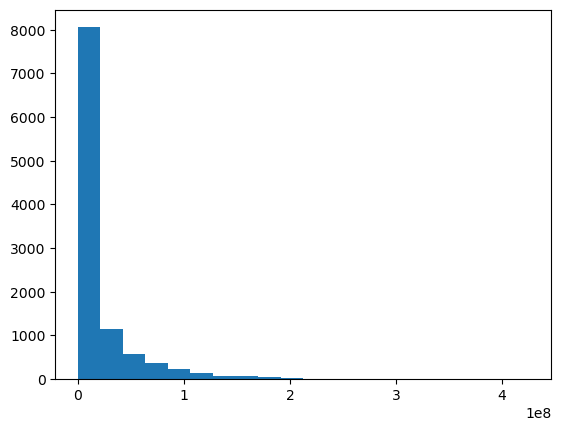

In [87]:
plt.hist(movie_df['budget_adj'], bins=20);

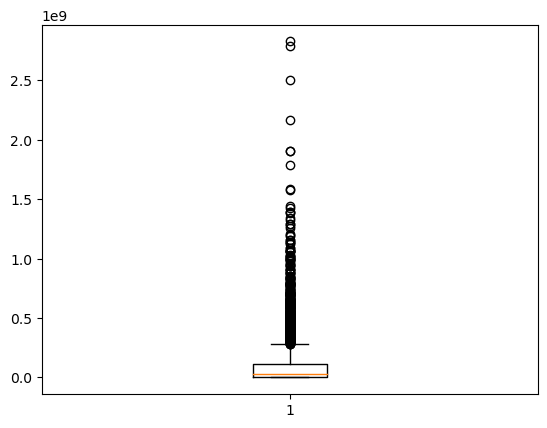

In [97]:
plt.boxplot(row_cal['revenue_adj']);

In [81]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10731 non-null  int64         
 1   popularity            10731 non-null  float64       
 2   original_title        10731 non-null  object        
 3   cast                  10731 non-null  object        
 4   director              10731 non-null  object        
 5   runtime               10731 non-null  int64         
 6   genres                10731 non-null  object        
 7   production_companies  10731 non-null  object        
 8   release_date          10731 non-null  datetime64[ns]
 9   vote_count            10731 non-null  int64         
 10  vote_average          10731 non-null  float64       
 11  release_year          10731 non-null  int64         
 12  budget_adj            10731 non-null  float64       
 13  revenue_adj     

In [92]:
row_cal=movie_df[movie_df['revenue_adj']!=0]
median_revenue=row_cal['revenue_adj'].median()

In [95]:
row_cal=movie_df[movie_df['budget_adj']!=0]
median_budget=row_cal['budget_adj'].median()
median_budget

22878673.0892549

In [98]:
row_cal['budget_adj'].describe()

count    5.153000e+03
mean     3.699582e+07
std      4.198202e+07
min      9.210911e-01
25%      8.142944e+06
50%      2.287867e+07
75%      5.024535e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [93]:
median_revenue

44028788.7291762

In [90]:
movie_df['budget_adj'].mean()

17765303.27294331

In [91]:
median=movie_df['budget_adj'].median()
median

0.0

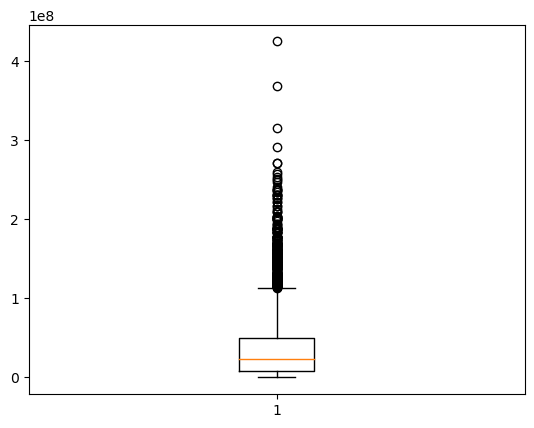

In [96]:
plt.boxplot(row_cal['budget_adj']);

In [38]:
movie_df['budget_adj']=movie_df['budget_adj'].replace(0.0, median)

C:\Users\HP\AppData\Local\Temp\ipykernel_11668\201697878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['budget_adj']=movie_df['budget_adj'].replace(0.0, median)


In [42]:
media_reve=movie_df['revenue_adj'].median()

In [43]:
movie_df['revenue_adj']=movie_df['revenue_adj'].replace(0.0, media_reve)

C:\Users\HP\AppData\Local\Temp\ipykernel_11668\60639262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['revenue_adj']=movie_df['revenue_adj'].replace(0.0, media_reve)


In [44]:
len(movie_df[movie_df['budget_adj']==0])/len(movie_df)

0.0

In [45]:
len(movie_df[movie_df['revenue_adj']==0])/len(movie_df)

0.5139173147769136

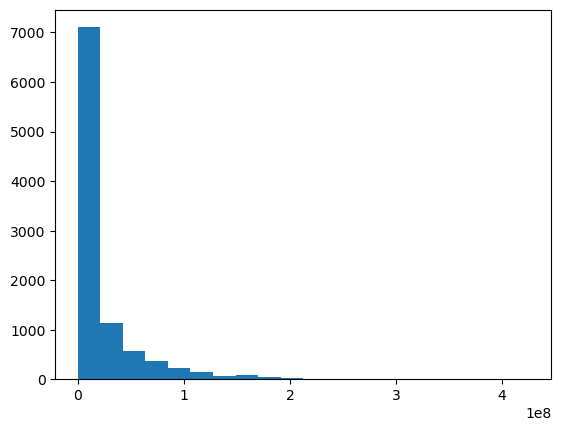

In [46]:
plt.hist(movie_df['budget_adj'], bins=20);

In [47]:
movie_df['budget_adj'].describe()

count    9.772000e+03
mean     1.956483e+07
std      3.558554e+07
min      9.210911e-01
25%      3.061342e+05
50%      3.087798e+05
75%      2.464268e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [48]:
movie_df['revenue_adj'].describe()

count    9.772000e+03
mean     5.705309e+07
std      1.514499e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.311848e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [ ]:
movie_df.to_csv('Cleaned_movies.csv', index=False)

In [257]:
movie_df['director'].value_counts()[:10]

Woody Allen          43
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      27
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

In [259]:
movie_df['release_date'].value_counts()

2009-01-01    24
2008-01-01    13
2014-10-10    13
2012-09-07    12
2007-01-01    11
              ..
2004-09-17     1
2004-11-03     1
2004-11-14     1
2004-11-26     1
2066-11-15     1
Name: release_date, Length: 5602, dtype: int64